● Resumen del caso presentado.

En este caso presentado podemos observar que es un dataframe con datos de partidas online de Counter Strike GO, el conjunto de datos corresponden a 7.000  partidas del juego. Los datos han sido extraídos de replays .

Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.

Significado de los Títulos.
* Map: Nombre del Mapa donde se jugó la partida.
* Team: Nombre de equipo al que pertenece el jugador.
* MatchId: Identificador de la partida.
* RoundId: Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)
* SteamID: Identificador único del jugador
* MatchId: Identificador de la partida
* MatchWinner: Indica si el jugador ganó o no la partida.
* RoundWinner: Indica si el jugador ganó o no la ronda analizada.
* Survived: Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).
* AbnormalMatch: Indica si la partida tuvo un error por conexión de red
* TimeAlive: Indica el tiempo en segundos que el jugador estuvo vivo durante el juego
* ScaledTimeAlive: Tiempo de vida del jugador escalado al tiempo de vida del jugador que más duró en la ronda.
* AvgCentroidDistance: Distancia promedio del jugador al centroide del equipo.
* TravelledDistance: Distancia promedio viajada por el jugador durante la partida.
* AvgSiteDistance: Distancia promedio del jugador al objetivo más cercano.
* AvgRoundVelocity: Velocidad promedio del jugador en la ronda.
* AvgKillDistance: Distancia promedio viajada por el jugador antes de su primer kill.
* RLethalGrenadesThrown/RNonLethalGrenadesThrown: Cantidad de granadas lanzadas, categorizadas en letales y no-letales.
* PrimaryXXXX: Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.
* [Match|Round]Assists: Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.
* [Match|Round]Kills: Cantidad de kills efectuados por el jugador durante la partida o la ronda.
* [Match|Round]FlankKills: Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.
* [Match|Round]HeadShots: Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.
* RoundStartingEquipmentValue: Valor del equipamiento llevado por el jugador al inicio de la ronda.
* TeamStartingEquipmentValue: Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.
* AvgMatchKillDist: Distancia promedio viajada por el jugador entre kills.

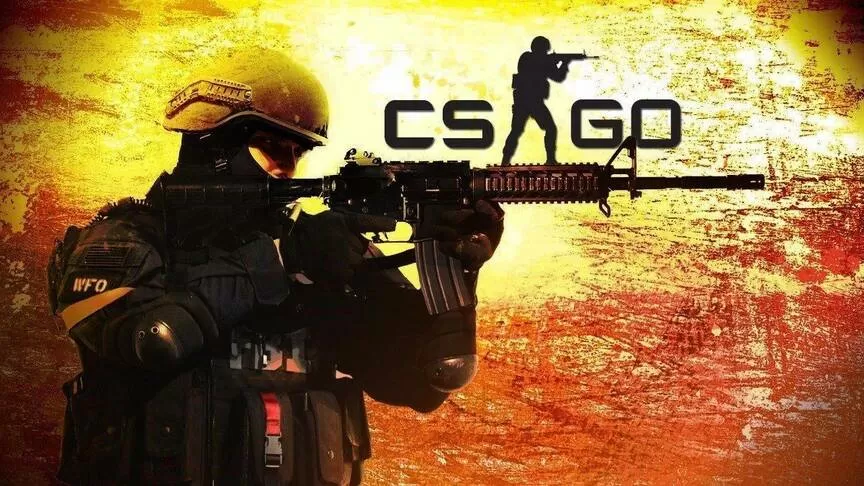

In [ ]:
#Cargamos el dataset con sus respectivos títulos para empezar a trabajar
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importamos las librerías a nuestro entorno de trabajo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df1 = pd.read_csv("/content/drive/My Drive/Anexo Forma B_demo_round_traces.csv",sep=";")

In [ ]:
# ● Descripción de los tipos de variables presentadas en el caso.
#Aquí podemos observar que esta guardado en un dataframe de pandas, además podemos ver que son 79157 entradas que parte de la 0 a la 79156, también nos dice que son 36 columnas.
#Cada columna nos dice que no tiene valores nulos y son de tipo float,object, bool etc.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79157 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   SteamId                      79157 non-null  int64  
 7   RoundWinner                  79157 non-null  bool   
 8   MatchWinner                  79157 non-null  bool   
 9   Survived                     79157 non-null  bool   
 10  AbnormalMatch                79157 non-null  bool   
 11  TimeAlive                    79157 non-null  float64
 12  ScaledTimeAlive              79157 non-null  float64
 13  AvgCentroidDista

In [ ]:
#Acá podemos ver nuestro dataframe, el sistema nos pone un indice automatico
df1.head()

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,SteamId,RoundWinner,MatchWinner,Survived,...,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
0,600,de_inferno,Terrorist,1,4,1,76561198036987787,False,True,False,...,0,0,0,750,4400,0,0,0,0,501379.183091
1,601,de_inferno,Terrorist,1,4,1,76561197971812216,False,True,False,...,0,0,0,800,4400,0,0,0,0,208807.587297
2,602,de_inferno,Terrorist,1,4,1,76561197972240652,False,True,False,...,0,0,0,1000,4400,0,0,0,0,381652.027911
3,603,de_inferno,Terrorist,1,4,1,76561197975824962,False,True,False,...,0,0,0,850,4400,0,0,0,0,289754.503091
4,604,de_inferno,Terrorist,1,4,1,76561197960331095,False,True,True,...,0,0,0,1000,4400,0,0,0,0,254527.691176


In [ ]:
#Aqui podemos ver para cada variable tenemos una cuenta, una media, una desviación estandar, un minimo, los cuartiles y un maximo.
#Ojo que lo realiza por columna para una mayor presición y solo entrega información numerica.
df1.describe()

,Unnamed: 0,InternalTeamId,MatchId,RoundId,SteamId,TimeAlive,ScaledTimeAlive,AvgCentroidDistance,TravelledDistance,AvgRoundVelocity,...,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
count,79157.000000,79157.000000,79157.000000,79157.000000,7.915700e+04,79157.000000,79157.000000,7.915700e+04,7.915700e+04,79157.000000,...,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,7.915700e+04
mean,60570.193640,1.500006,250.525033,12.765517,7.656120e+16,72.795720,0.829561,1.122538e+06,1.041888e+05,84.351773,...,0.146178,0.301553,0.095633,3778.108695,18890.133532,8.511578,1.209912,1.874831,3.858484,6.288927e+05
std,36436.598386,0.500003,149.557804,7.432837,3.342137e+07,48.321035,0.210842,1.134700e+06,3.543487e+05,171.890139,...,0.385601,0.578843,0.320641,2111.285406,9743.203024,6.195079,1.435150,1.824027,3.246752,3.402574e+05
min,600.000000,1.000000,4.000000,1.000000,7.656120e+16,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,30830.000000,1.000000,128.000000,6.000000,7.656120e+16,47.080072,0.698892,2.578825e+05,5.898255e+04,56.202641,...,0.000000,0.000000,0.000000,1600.000000,10900.000000,3.000000,0.000000,0.000000,1.000000,4.097790e+05
50%,56720.000000,2.000000,236.000000,12.000000,7.656120e+16,69.239615,0.922777,7.409804e+05,8.601557e+04,83.617316,...,0.000000,0.000000,0.000000,4700.000000,22550.000000,8.000000,1.000000,1.000000,3.000000,5.542432e+05
75%,90639.000000,2.000000,373.000000,19.000000,7.656120e+16,92.647813,1.000000,1.753172e+06,1.213966e+05,104.131144,...,0.000000,0.000000,0.000000,5200.000000,26050.000000,13.000000,2.000000,3.000000,6.000000,7.524568e+05
max,123779.000000,2.000000,511.000000,36.000000,7.656120e+16,2990.560394,2.000000,2.202346e+07,3.964645e+07,24111.819781,...,4.000000,5.000000,5.000000,8850.000000,36150.000000,41.000000,11.000000,14.000000,22.000000,5.170168e+06


In [ ]:
#Podemos usar este comando para contar las filas por cada columna y ver las cantidades exactas
df1.count()

Unnamed: 0                     79157
Map                            79157
Team                           79157
InternalTeamId                 79157
MatchId                        79157
RoundId                        79157
SteamId                        79157
RoundWinner                    79157
MatchWinner                    79157
Survived                       79157
AbnormalMatch                  79157
TimeAlive                      79157
ScaledTimeAlive                79157
AvgCentroidDistance            79157
TravelledDistance              79157
AvgRoundVelocity               79157
AvgKillDistance                79157
AvgSiteDistance                79157
RLethalGrenadesThrown          79157
RNonLethalGrenadesThrown       79157
PrimaryAssaultRifle            79157
PrimarySniperRifle             79157
PrimaryHeavy                   79157
PrimarySMG                     79157
PrimaryPistol                  79157
FirstKillTime                  79157
RoundKills                     79157
R

In [ ]:
#Acá nos entrega las filas y luego las cantidades de forma exacta y precisa.
df1.shape

(79157, 37)

ver 3_2_2


In [ ]:
#aqui podemos ver la correlacion de todas las variables
df1_corr = df1.corr(method="spearman")
df1_corr

,Unnamed: 0,InternalTeamId,MatchId,RoundId,SteamId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,...,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
Unnamed: 0,1.000000,0.000138,0.999995,0.005611,0.033736,0.000227,-0.015692,-0.003600,NaN,-0.026204,...,0.002087,-0.019902,0.005127,0.024577,0.029875,0.007818,0.016107,0.015800,-0.044046,-0.025044
InternalTeamId,0.000138,1.000000,0.000029,-0.000008,-0.009223,-0.067423,-0.079474,0.044872,NaN,0.007051,...,0.017833,0.003902,0.019407,0.093846,0.105060,0.110251,0.177240,0.113087,0.013065,0.013408
MatchId,0.999995,0.000029,1.000000,0.002585,0.033739,0.000234,-0.015683,-0.003561,NaN,-0.026132,...,0.002090,-0.019898,0.005098,0.024217,0.029487,0.005299,0.014493,0.013942,-0.046213,-0.025046
RoundId,0.005611,-0.000008,0.002585,1.000000,0.007640,0.000428,-0.016463,-0.016046,NaN,-0.004589,...,-0.001578,-0.000805,0.010951,0.110926,0.118358,0.832537,0.534917,0.614907,0.721262,-0.011205
SteamId,0.033736,-0.009223,0.033739,0.007640,1.000000,0.019961,0.029308,-0.017663,NaN,-0.020063,...,-0.001655,0.003463,-0.000603,-0.005724,-0.012448,0.020253,-0.001141,0.002205,0.011372,0.023147
RoundWinner,0.000227,-0.067423,0.000234,0.000428,0.019961,1.000000,0.229572,-0.359380,NaN,-0.136990,...,-0.120351,-0.157703,-0.127942,-0.300228,-0.317676,-0.092831,-0.072328,-0.073416,-0.071643,-0.020913
MatchWinner,-0.015692,-0.079474,-0.015683,-0.016463,0.029308,0.229572,1.000000,-0.143498,NaN,-0.053016,...,-0.058922,-0.064920,-0.045102,-0.185464,-0.203031,-0.180782,-0.112398,-0.157137,-0.143486,-0.048182
Survived,-0.003600,0.044872,-0.003561,-0.016046,-0.017663,-0.359380,-0.143498,1.000000,NaN,0.332515,...,-0.067562,0.199100,0.138927,0.173124,0.169542,0.064049,0.052085,-0.007572,0.050913,0.026826
AbnormalMatch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TimeAlive,-0.026204,0.007051,-0.026132,-0.004589,-0.020063,-0.136990,-0.053016,0.332515,NaN,1.000000,...,-0.010925,0.163944,0.098921,0.165328,0.164971,0.034238,0.030643,0.002781,0.033858,-0.060479


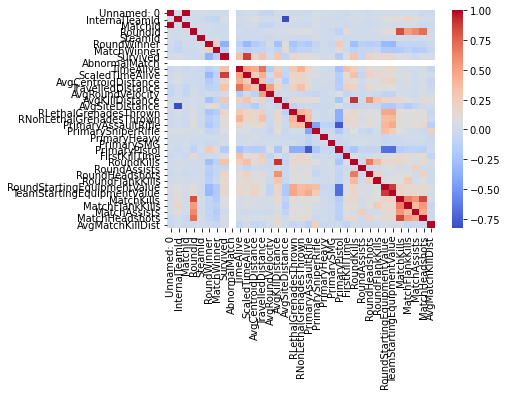

In [ ]:
# ● Matriz de correlación para el conjunto de variables factible.
# Acá nos podemos dar cuenta que los colores de correlacion se encuentran en la barra del lado derecho, siendo el rojo correlaciones positivas y el azul correlaciones negativas
sns.heatmap(df1_corr,
            xticklabels=df1_corr.columns,
            yticklabels=df1_corr.columns,
            cmap='coolwarm')

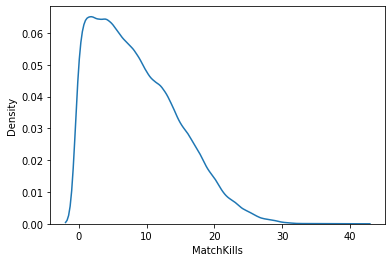

In [ ]:
#Aqui podemos ver la cantidad de kill en las partidas
from seaborn import kdeplot
kdeplot(df1.MatchKills)

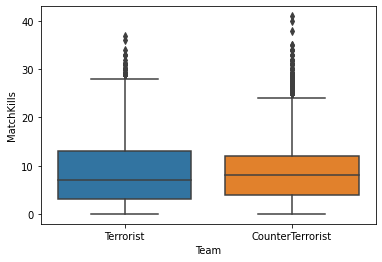

In [ ]:
#Acá podemos ver la cantidad de kill en cada partida por terrorista o coop
from seaborn import boxplot
boxplot(x="Team", y="MatchKills", data=df1)

In [ ]:
#df1 = pd.get_dummies(data=df1, drop_first=True)
df1 = df1.select_dtypes(np.number)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   InternalTeamId               79157 non-null  int64  
 2   MatchId                      79157 non-null  int64  
 3   RoundId                      79157 non-null  int64  
 4   SteamId                      79157 non-null  int64  
 5   TimeAlive                    79157 non-null  float64
 6   ScaledTimeAlive              79157 non-null  float64
 7   AvgCentroidDistance          79157 non-null  float64
 8   TravelledDistance            79157 non-null  float64
 9   AvgRoundVelocity             79157 non-null  float64
 10  AvgKillDistance              79157 non-null  float64
 11  AvgSiteDistance              79157 non-null  float64
 12  RLethalGrenadesThrown        79157 non-null  int64  
 13  RNonLethalGrenad

In [ ]:
#Agregamos las coordenadas x e y
y = df1['PrimaryPistol']
X = df1.drop('PrimaryPistol', axis=1)

In [ ]:
#aqui creamos el modelo
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3)

In [ ]:
#aqui ajustamos el modelo
model.fit(X=X, y=y)

DecisionTreeClassifier(max_depth=3)

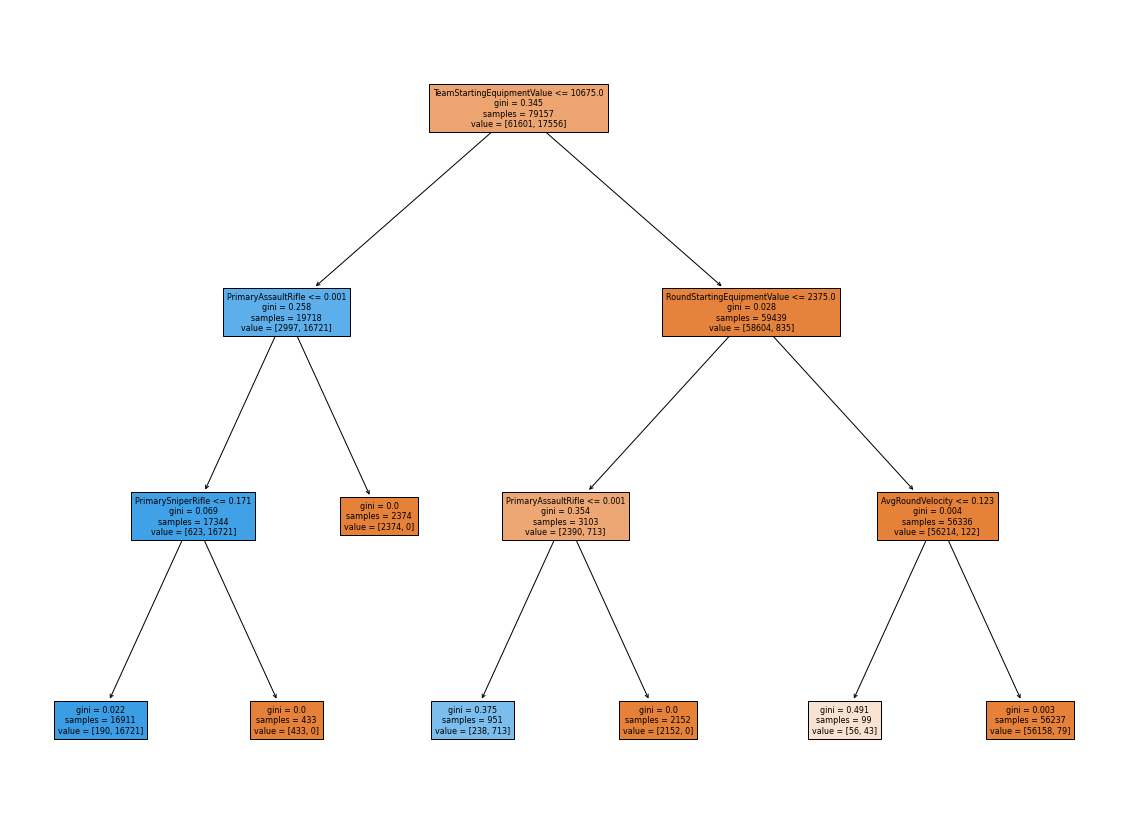

In [ ]:
#y por esta parte mostramos el arbol de decision
plt.figure(figsize=(20, 15))
from sklearn.tree import plot_tree
plot_tree(decision_tree=model, feature_names=X.columns, filled=True, fontsize=8);

In [ ]:
#aqui buscamos un un jugador al azar de la variable x
a = X.sample()

In [ ]:
a

,Unnamed: 0,InternalTeamId,MatchId,RoundId,SteamId,TimeAlive,ScaledTimeAlive,AvgCentroidDistance,TravelledDistance,AvgRoundVelocity,...,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
8368,12399,2,52,14,76561198012299323,63.770969,1.0,600024.116722,56977.381566,34.934017,...,0,0,1,6200,28700,12,2,2,3,498472.551826


In [ ]:
model.predict_proba(a)

array([[0.99859523, 0.00140477]])

In [ ]:
y_pred = model.predict(X)

In [ ]:
df1['pred'] = y_pred

In [ ]:
df1.sample(10)[['PrimaryPistol', 'pred']]

,PrimaryPistol,pred
56395,0,0
7727,0,0
4837,0,0
23196,0,0
71987,0,0
18955,0,0
35004,0,0
63339,0,0
61648,0,0
2165,0,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

X = df1[['MatchWinner', 'RoundAssists','RoundHeadshots','SteamId','Survived','TravelledDistance', ]]
Y = df1[['RoundWinner']]



mo2 = DecisionTreeRegressor(max_depth=3)
mo2.fit(X, Y)

Yhat = mo2.predict(X)

mse = mean_squared_error(Y, Yhat)
mae = mean_absolute_error(Y, Yhat)
R2 = r2_score(Y, Yhat)

print("MSE: ",mse)
print("MAE: ",mae)
print("R^2: ",R2)

MSE:  0.2043645236229409
MAE:  0.4087290472458818
R^2:  0.182541847974117


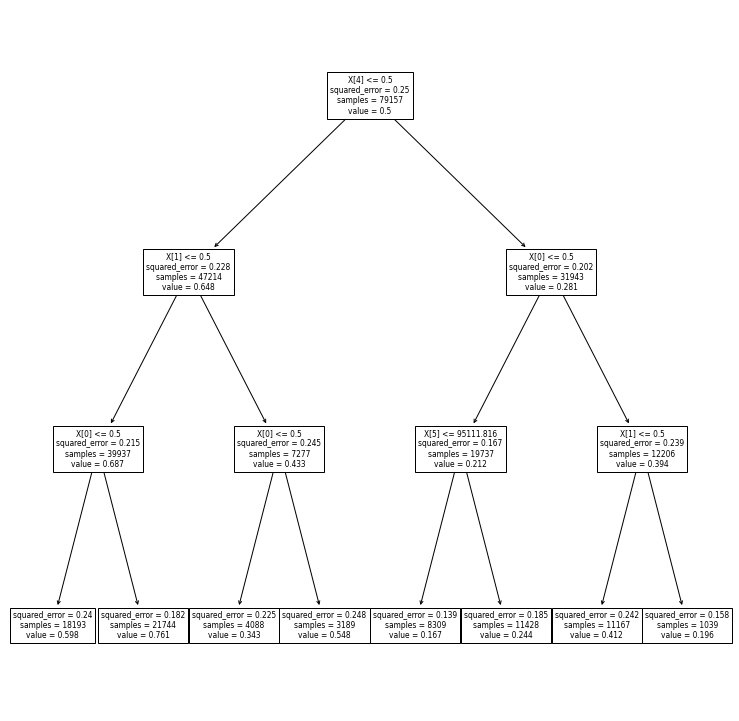

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.subplots(1,1,figsize=(13,13))
_= tree.plot_tree(mo2)

# Conclusión:

En este documento pudimos observar si el jugar usa o no la pistola, ademas podemos afirmar
que el equipo terrorista tiene mas kills que el equipo Counter terrorist y la cantidad de kill por partidas.

La cantidad de jugadores por equipo, el tiempo en el que el jugador se mantiene vivo en la partida,
las veces que el jugador asiste a otro, la cantidad de partidas ganadas por jugador y por equipo, la distancia
recorrida dentro del juego.

Ademas de esto pudimos graficar el tipo de arma,las partidas perdidas.